In [1]:
import camb
from camb import model, initialpower
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# 2018 standard Planck cosmology
# Scalar spectral index
ns = 0.9645
# Scalar amplitude
As = 2.1e-9
# Optical depth
tau = 0.0561

In [3]:
def PowerSpectrum(Omch2, Ombh2, H0, z_arr, Nk):
    # Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=Ombh2, omch2=Omch2, tau=tau)
    pars.InitPower.set_params(ns=ns, As=As)
    # Compute the matter power spectrum
    pars.set_matter_power(redshifts=z_arr, kmax=5.0)
    results = camb.get_results(pars)
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=5.0, npoints=Nk)
    return k, z, pk

6) Muestra que la forma del espectro de potencias de materia depende muy poco del parámetro $\Omega_m$ cuando $\omega_m = \Omega_m h^2$ está fijo. Para esto usa CLASS o CAMB para graficar distintos espectros que cumplan la restricción de $\omega_m$ constante. Has estas gráficas en unidades físicas, es decir usando $\text{Mpc}^{−1}$ (sin $h$). Luego, grafica en las unidades convencionales, i.e. las unidades rescaladas con $h$.

In [4]:
# Define cosmological parameters
Ommh2_cte = 0.13467
# Matter abudance
Omm = np.array([0.5, 0.3, 0.1])
# Value oh h
h = np.zeros(Omm.size)
for i in range (Omm.size):
    h[i] = np.sqrt(Ommh2_cte/Omm[i])
# Hubble parameter
H0 = h*100
# Physical matter density
Ommh2 = Omm*(h**2)
# Physical cold dark matter density
Omch2 = (5/6)*Ommh2
# Physical baryon density
Ombh2 = (1/6)*Ommh2
# Redshift
z_value = [0.0]

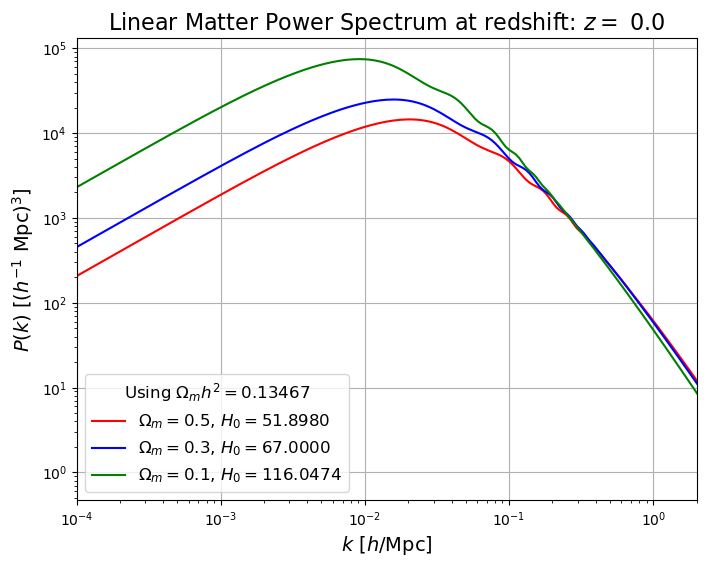

In [18]:
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel('$P(k)$ [($h^{-1}$ Mpc)$^3$]', fontsize=14)
for i, color in zip([0,1,2], colors):
    k, z, Pk = PowerSpectrum(Omch2[i], Ombh2[i], H0[i], z_value, 200)
    axs.loglog(k, Pk[0], color=color, label=f'$\Omega_m=${Omm[i]}, $H_0 = {H0[i]: .4f}$')
axs.set_xlim(1e-4,2.0)
axs.set_title(f'Linear Matter Power Spectrum at redshift: $z = $ {z[0]}', fontsize=16)
# axs.legend(prop={'size': 14}, title=f"Using $\Omega_m h^2 = {Ommh2_cte}$")
legend = axs.legend(prop={'size': 12})#, title=f"Using $\Omega_m h^2 = {Ommh2_cte}$")
legend.set_title(f"Using $\Omega_m h^2 = {Ommh2_cte}$", prop={'size': 12})  # Adjust the size as needed ('small', 'medium', 'large', etc.)
axs.grid(True)
plt.show()

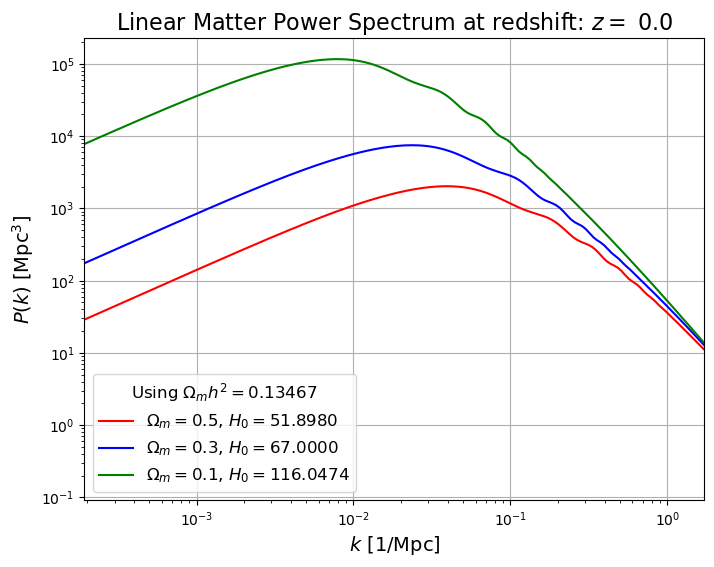

In [20]:
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xlabel('$k$ [1/Mpc]', fontsize=14)
axs.set_ylabel('$P(k)$ [Mpc$^3$]', fontsize=14)
for i, color in zip([0,1,2], colors):
    k, z, Pk = PowerSpectrum(Omch2[i], Ombh2[i], H0[i], z_value, 200)
    axs.loglog(k/h[i], Pk[0]*(h[i]**3), color=color, label=f'$\Omega_m=${Omm[i]}, $H_0 = {H0[i]: .4f}$')
axs.set_xlim(1e-4/h[0],2.0/h[2])
axs.set_title(f'Linear Matter Power Spectrum at redshift: $z = $ {z[0]}', fontsize=16)
# axs.legend(prop={'size': 14}, title=f"Using $\Omega_m h^2 = {Ommh2_cte}$")
legend = axs.legend(prop={'size': 12})#, title=f"Using $\Omega_m h^2 = {Ommh2_cte}$")
legend.set_title(f"Using $\Omega_m h^2 = {Ommh2_cte}$", prop={'size': 12})  #
axs.grid(True)
plt.show()

7) Considera una cosmología dada por el mejor ajuste a Planck 2018. i) Obtén el espectro de potencias para materia para los corrimientos al rojo $z = 50, 10, 5, 1, 0$ usando CAMB o CLASS. ii) Calcula la función de crecimiento lineal $D_{+}(z)$ a esos mismos corrimientos al rojo con la convención de $D_{+}(z = 0) = 1$. iii) Considera el espectro de potencias que encontraste en i) a $z = 0$, y reescalalo usando la función de crecimiento lineal para obtener los espectros de potencias a $z = 50, 10, 5, 1$. i.e., encuentra $P_L(z) = D^2_{+}(z)P(z = 0)$. iv) Compara los espectros obtenidos en i) y iii) graficando su diferencia relativa $\Delta P_L/P_L$ para cada uno de los redshifts $z = 50, 10, 5, 1$.

In [ ]:
# Define cosmological parameters
h = 0.677
H0 = 100*h
Ombh2 = 0.022
Omch2 = 0.11933
z_arr = [0.0, 1.0, 5.0, 10.0, 50.0]

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


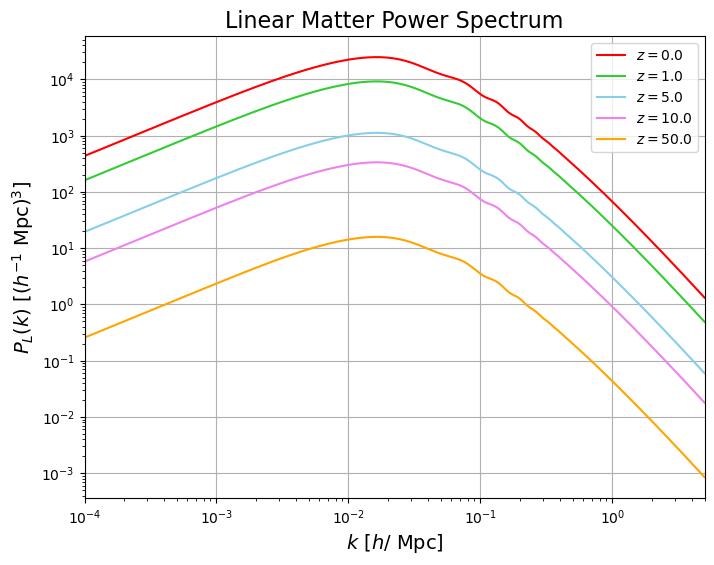

In [ ]:
colors = ['r', 'limegreen', 'skyblue', 'violet', 'orange']
fig, axs = plt.subplots(figsize = (8, 6))
axs.set_xlabel('$k$ [$h$/ Mpc]', fontsize=14)
axs.set_ylabel('$P_L(k)$ [($h^{-1}$ Mpc)$^3$]', fontsize=14)
for i, color in zip([0, 1, 2, 3, 4], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2, H0, z_arr, 200)
    axs.loglog(k, Pk[i], color=color, label=f'$z=${z_arr[i]}')
axs.set_xlim(1e-4,5.0)
axs.set_title(f'Linear Matter Power Spectrum', fontsize=16)
axs.legend(prop={'size': 10})
axs.grid(True)
plt.show()

In [ ]:
OmM0 = Omch2/(h**2)
# Redshift z
z_min = -0.99
z_max = 400
# Scale factor 
def etaofz(z):
    return np.log(1/(1 + z))  
etaini = etaofz(z_max)
etafin = etaofz(z_min)

In [ ]:
def find_closest_index(array, number):
    # Calculate absolute differences
    absolute_diff = np.abs(array - number)
    # Find index of the minimum absolute difference
    closest_index = np.argmin(absolute_diff)
    return closest_index

In [ ]:
def interp(k, x, y):
    inter = CubicSpline(x, y)
    return inter(k)  
#Getting f0
def OmM(eta):
    return 1/(1 + ((1-OmM0)/OmM0)* np.exp(3*eta) )
def f1(eta):
    return 2 - 3/2 * OmM(eta)
def f2(eta):
    return 3/2 * OmM(eta) 
# Differential eqs.
def Deqs(Df, eta):
    Df, Dprime = Df
    return [Dprime, f2(eta)*Df - f1(eta)*Dprime]
# eta range and initial conditions
eta = np.linspace(etaini, etafin, 10000)   
Df0 = np.exp(etaini)
Df_p0 = np.exp(etaini)
#solution
from scipy.integrate import odeint
Dplus, Dplusp = odeint(Deqs, [Df0,Df_p0], eta).T
eta_0 = find_closest_index(eta, 0)
D_a = Dplus/Dplus[eta_0]


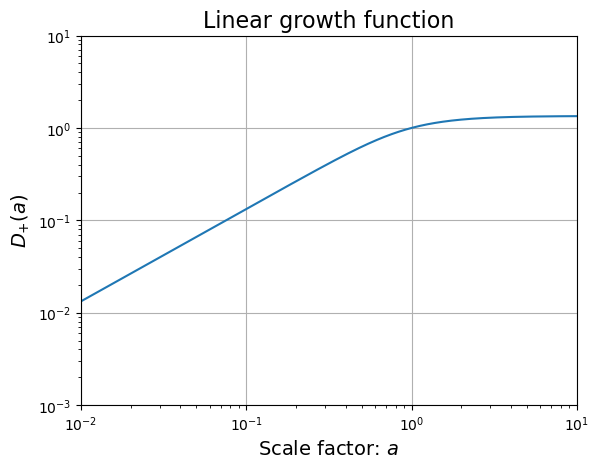

In [ ]:
# plt.plot(np.exp(eta), Dplus)
plt.plot(np.exp(eta), D_a)
plt.title('Linear growth function', fontsize=16)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.ylabel('$D_{+}(a)$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 10)
plt.ylim(1e-3, 10)
plt.grid()

In [ ]:
def PowerSpectrum_z(z):
    # def linear_growth(z):
    z_arr = np.exp(-eta) - 1
    D_z_index = find_closest_index(z_arr, z)
    D_z = D_a[D_z_index]
    k0, z0, Pk0 = PowerSpectrum(Omch2, Ombh2, H0, [0], 2000)
    return k0, D_z**2*Pk0[0]

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


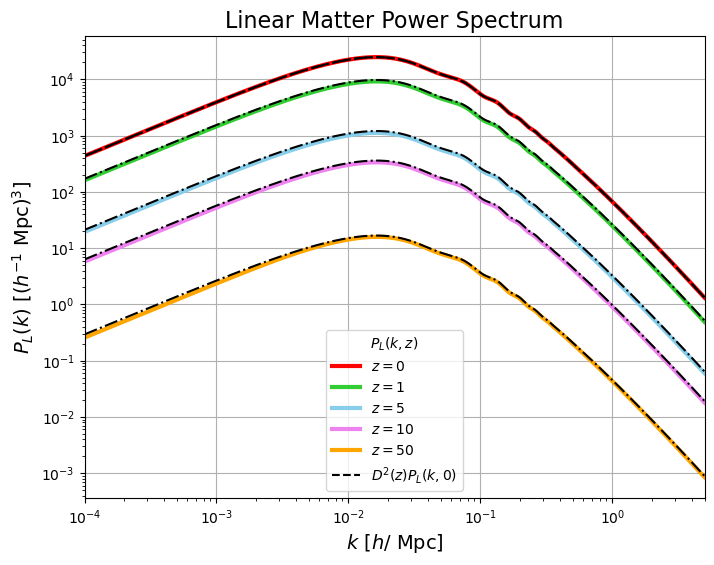

In [ ]:
z_arr = [0, 1, 5, 10, 50]

fig, axs = plt.subplots(figsize = (8, 6))
axs.set_xlabel('$k$ [$h$/ Mpc]', fontsize=14)
axs.set_ylabel('$P_{L}(k)$ [($h^{-1}$ Mpc)$^3$]', fontsize=14)

for i, color in zip([0, 1, 2, 3, 4], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2, H0, z_arr, 2000)
    kz, pkz = PowerSpectrum_z(z_arr[i])
    axs.loglog(k, Pk[i], color=color, label=f'$z=${z_arr[i]}', linewidth=3)
    axs.loglog(kz, pkz, color='black', ls ='-.')

kz0, pk0 = PowerSpectrum_z(0)
axs.loglog(kz0, pk0, color='black', label=f'$D^2(z)P_L(k,0)$', ls='--')

axs.set_xlim(1e-4,5.0)
axs.set_title(f'Linear Matter Power Spectrum', fontsize=16)
axs.legend(prop={'size': 10}, title=f"$P_L(k,z)$")
axs.grid(True)
plt.show()

In [ ]:
def Diference_relative(Pk, z):
    # def linear_growth(z):
    z_arr = np.exp(-eta) - 1
    D_z_index = find_closest_index(z_arr, z)
    D_z = D_a[D_z_index]
    k0, z0, Pk0 = PowerSpectrum(Omch2, Ombh2, H0, [0], 2000)
    Pk_z = D_z**2*Pk0[0]
    Dif = (Pk - Pk_z)/Pk
    return Dif

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


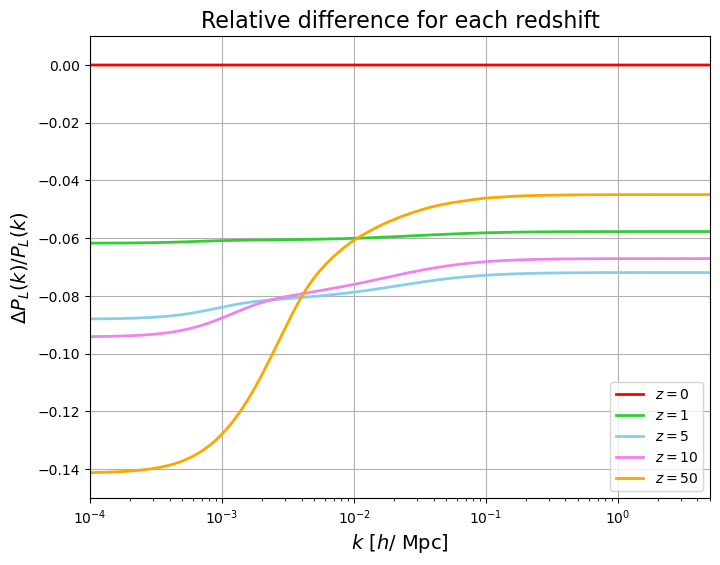

In [ ]:
fig, axs = plt.subplots(figsize = (8, 6))
axs.set_xlabel('$k$ [$h$/ Mpc]', fontsize=14)
axs.set_ylabel('$\\Delta P_L(k)/P_L(k)$', fontsize=14)

for i, color in zip([0, 1, 2, 3, 4], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2, H0, z_arr, 2000)
    dif = Diference_relative(Pk[i], z_arr[i])
    axs.plot(k, dif, color=color, label=f'$z=${z_arr[i]}', linewidth=2)

axs.set_ylim(-0.15,0.01)
axs.set_xscale('log')
axs.set_xlim(1e-4,5.0)
axs.set_title(f'Relative difference for each redshift', fontsize=16)
axs.legend(prop={'size': 10})#, title=f"$P_L(z)$")
axs.grid(True)
plt.show()

8) Graficar el espectro de potencias de materia lineal en espacio real $P_L(k)$ para distintas abundancias de bariones $\omega_b = \Omega_b h^2 = 0.022, 0.019, 0.025$ a redshift $z = 0$ dejando fijo $h = 0.677$. Escribe un pequeño código en el lenguaje que prefieras, para encontrar la función de correlación $\xi_L (r)$ en cada caso, o usa el que se dio en clase. Grafica las funciones de correlación para cada uno de los casos considerados. Despues de esto, encuentra el horizonte de sonidos en la época del drag $r^{\text{drag}}_s$ y verifica que el pico de BAO para cada una de las funciones de correlación se localiza a esta escala.

In [ ]:
z0 = [0.0]
h = 0.677
H0 = 100*h
Ombh2_list = np.array([0.022, 0.019, 0.025])
Omch2 = 0.11933

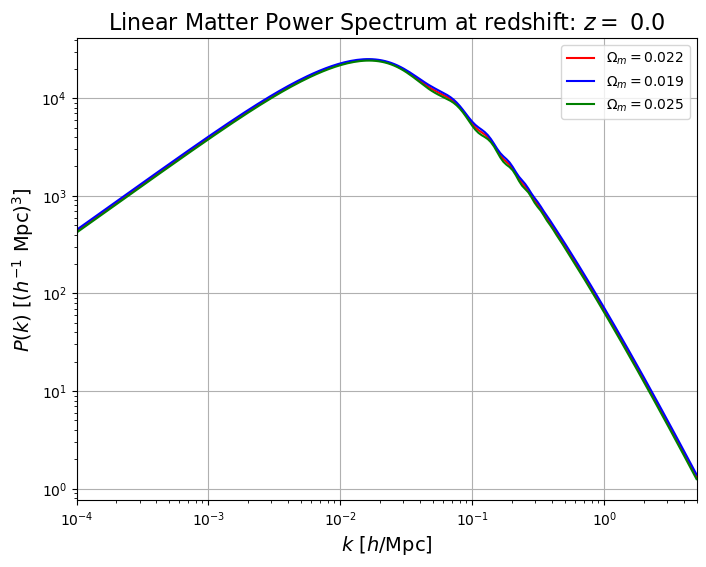

In [ ]:
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xlabel('$k$ [$h$/Mpc]', fontsize=14)
axs.set_ylabel('$P(k)$ [($h^{-1}$ Mpc)$^3$]', fontsize=14)
for i, color in zip([0,1,2], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2_list[i], H0, z_value, 200)
    axs.loglog(k, Pk[0], color=color, label=f'$\Omega_m=${Ombh2_list[i]}')
axs.set_xlim(1e-4,5.0)
axs.set_title(f'Linear Matter Power Spectrum at redshift: $z = $ {z[0]}', fontsize=16)
axs.legend(prop={'size': 10})
axs.grid(True)
plt.show()

In [ ]:
def get_xi(k, Pk, b, rmax):
    kh = k
    r = np.linspace(0, rmax, len(k))
    N_k = np.linspace(0, len(k), len(k))
    delta_log = np.log(kh[1]) - np.log(kh[0])
    xi = np.zeros(len(k))
    def f(kh, r_val):
        return (kh**3)/(2*np.pi**2)*np.exp(-b*kh**2)*scipy.special.spherical_jn(0, kh*r_val) 
    for jj, r_val in enumerate(r):
        for ii in range(1, len(N_k)):
            xi_val = 0.5*delta_log*(f(k[ii], r_val) + f(k[ii - 1], r_val))*Pk[ii]
            xi[jj] += xi_val
    return r, xi

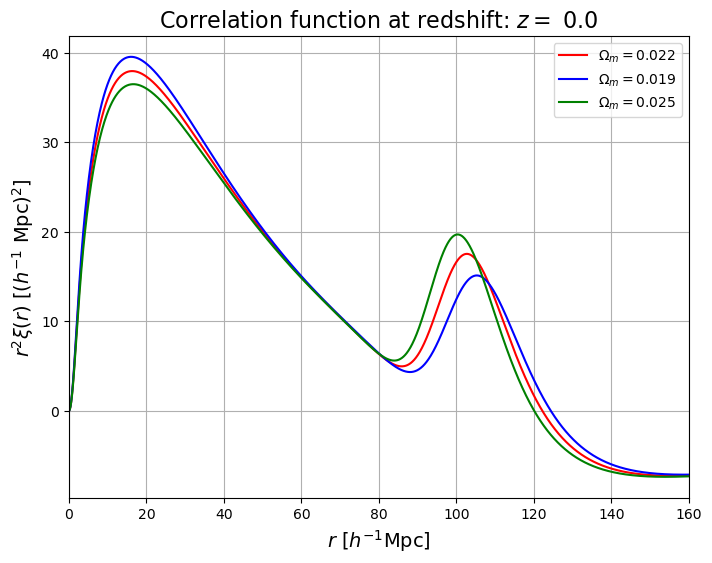

In [ ]:
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=14)
axs.set_ylabel('$r^2\\xi(r)$ [($h^{-1}$ Mpc)$^2$]', fontsize=14)
for i, color in zip([0,1,2], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2_list[i], H0, z_value, 2000)
    r, xi = get_xi(k=k, Pk=Pk[0], b=1, rmax=160)
    axs.plot(r, r**2*xi, color=color, label=f'$\Omega_m=${Ombh2_list[i]}')
axs.set_title(f'Correlation function at redshift: $z = $ {z[0]}', fontsize=16)
axs.legend(prop={'size': 10})
axs.set_xlim(0,160)
axs.grid(True)
plt.show() 

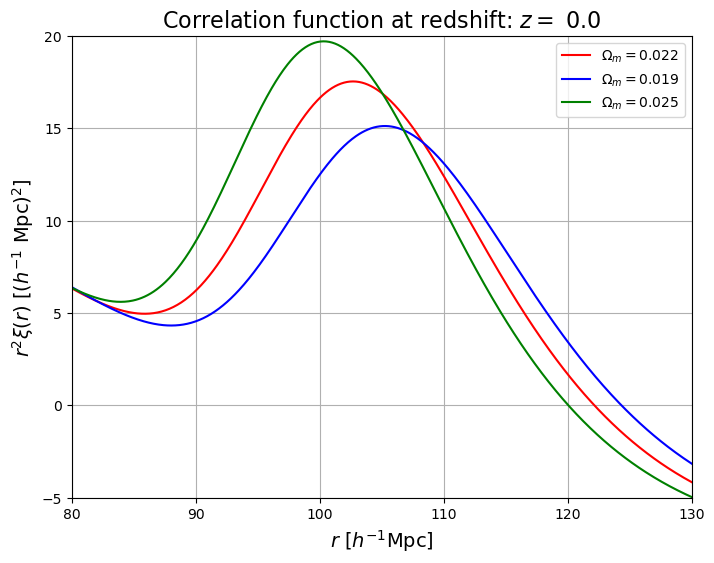

In [ ]:
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=14)
axs.set_ylabel('$r^2\\xi(r)$ [($h^{-1}$ Mpc)$^2$]', fontsize=14)
for i, color in zip([0,1,2], colors):
    k, z, Pk = PowerSpectrum(Omch2, Ombh2_list[i], H0, z_value, 2000)
    r, xi = get_xi(k=k, Pk=Pk[0], b=1, rmax=160)
    axs.plot(r, r**2*xi, color=color, label=f'$\Omega_b=${Ombh2_list[i]}')
axs.set_title(f'Correlation function at redshift: $z = $ {z[0]}', fontsize=16)
axs.legend(prop={'size': 10})
axs.set_xlim(80,130)
axs.set_ylim(-5,20)
axs.grid(True)
plt.show() 

In [ ]:
def r_drag(omb, omc, omnu):
    r_drag = (55.154*np.exp(-72.3*(omnu + 0.0006)**2)) / ((omc + omb)**(0.25351)*omb**(0.12807))
    return r_drag

In [1]:
r_drag(Ombh2_list[1], Omch2, 0)*h

NameError: name 'r_drag' is not defined